# 9152PS2021016
# A.R.F.Azfa





## Importing libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [40]:
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Azfa
[nltk_data]     Razzaq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Q01 - a) sentiment analysis

In [136]:
df=pd.read_csv("sentiment analysis/Twitter sentiment data.csv")

In [137]:
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [138]:
df.shape


(31962, 3)

##  Data Preprocessing

### Drop id columns

In [139]:
# drop id 
df.drop(columns='id',inplace=True)

In [140]:
df.head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


### Check for duplicates

In [141]:
# check for duplicates

df.duplicated().sum()

2432

### Drop duplicates

In [142]:
df = df.drop_duplicates(keep='first')

duplicated rows are removed from the dataset


In [143]:
df.shape

(29530, 2)

All the duplicated values has been removed

### Check for missing values

In [146]:
# check for missing values

df.isnull().sum()

label    0
tweet    0
dtype: int64

No missing values

### Check the proportion of the label variable

In [147]:
df.label.value_counts()

0    27517
1     2013
Name: label, dtype: int64

The records with positive feedback are much greater than the negative feedback record. hence the data is imbalanced

### NLP importing libraries

In [51]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Azfa
[nltk_data]     Razzaq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Transform to lower case

Transform all the text in to lower case

In [148]:
df['tweet']=df.tweet.apply(lambda x:x.lower())

### Remove the word @user

The word user is meaningless. hence it should be removed

In [149]:
import re
def remove_user(text):
    pattern='\@(user)'
    return re.sub(pattern,string=text,repl='')

In [150]:
df['cleaned_tweet']=df.tweet.apply(remove_user)

In [151]:
df.head(20)

,label,tweet,cleaned_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


### Changing the index order

In [152]:
df.index=range(0,29530)

### Counting the number of hashtags 

In [153]:
def count_hashtag(text):
    b=0
    a=text.split()
    for x in a:
        if x.startswith('#'):
            b=b+1
    return b

In [154]:
df['hashcount']=df.tweet.apply(count_hashtag)

In [155]:
df.head(10)

,label,tweet,cleaned_tweet,hashcount
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,1
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,3
2,0,bihday your majesty,bihday your majesty,0
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,1
4,0,factsguide: society now #motivation,factsguide: society now #motivation,1
5,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,1
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦,0
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...,7
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,5
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !,1


### Checking for hashtags

In [156]:
# function to extract hashtags

def hashtag(text):
    b=[]
    a=text.split()
    for x in a:
        if x.startswith('#'):
            b.append(x)
    return b

#### Getting possitive hashtags

In [63]:
positive_hashtags=(df['cleaned_tweet'][df['label']==0]).apply(hashtag)

In [64]:
a=positive_hashtags.to_numpy()

In [65]:
a

array([list(['#run']), list(['#lyft', '#disapointed', '#getthanked']),
       list([]), ..., list(['#shame', '#imwithher']), list([]), list([])],
      dtype=object)

In [66]:
# getting all the positive hashtags in one array

b=[]
print(len(a))
for i in range(0,len(a)):
    for j in range(0,len(a[i])):
        b.append(a[i][j])
print(b)

27517
['#run', '#lyft', '#disapointed', '#getthanked', '#model', '#motivation', '#allshowandnogo', '#school', '#exams', '#hate', '#imagine', '#actorslife', '#revolutionschool', '#girl', '#allin', '#cavs', '#champions', '#cleveland', '#clevelandcavaliers', '#gr8', '#ireland', '#blog', '#silver', '#gold', '#forex', '#orlando', '#standwithorlando', '#pulseshooting', '#orlandoshooting', '#biggerproblems', '#selfish', '#heabreaking', '#values', '#love', '#', '#80days', '#gettingfed', '#junior', '#yugyoem', '#omg', '#thankful', '#positive', '#friday!', '#cookies', '#euro2016', '#badday', '#coneofshame', '#cats', '#pissed', '#funny', '#laughs', '#wine', '#weekend?', '#tgif', '#ff', '#gamedev', '#indiedev', '#indiegamedev', '#squad!', '#upsideofflorida', '#shopalyssas', '#love', '#smiles', '#media', '#pressconference', '#antalya', '#turkey', '#throwback', '#ica16', '#rip#orlando', '#alohafriday', '#time', '#not', '#exist', '#positivevibes', '#hawaiian', '#goodnight', '#badmonday', '#taylorswif

#### Making the positive hashtags to  a data frame

In [67]:
b=np.array(b)
x=np.unique(b,return_counts=True)
S=pd.DataFrame(x)
S=S.transpose()
S.columns=['positive hashtag','no of occuring']
S.head()


,positive hashtag,no of occuring
0,#,154
1,##,1
2,######,1
3,##########,1
4,##amped,1


#### The first 2o hashtags which occured in the positive lables

In [68]:
df_positive=S.sort_values(by=['no of occuring'],ascending=False).head(20)
df_positive

,positive hashtag,no of occuring
12625,#love,1309
19130,#smile,503
16678,#positive,471
7971,#fun,403
12174,#life,371
2624,#blog,341
20032,#summer,337
18887,#silver,299
8635,#gold,297
4940,#cute,292


In [69]:
df_positive.columns

Index(['positive hashtag', 'no of occuring'], dtype='object')

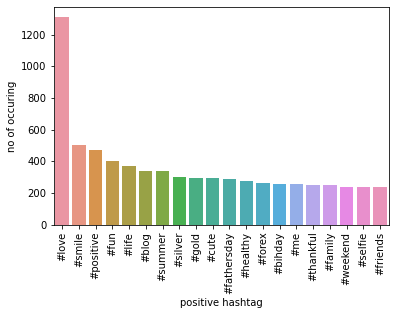

In [70]:
ax=sns.barplot(x=df_positive['positive hashtag'], y=df_positive['no of occuring'])
plt.xticks(rotation=90);

#### Negative hashtag 

In [71]:
negative_hashtags=(df['cleaned_tweet'][df['label']==1]).apply(hashtag)
a=negative_hashtags.to_numpy()

# getting all the negative hashtags in one array

b=[]

for i in range(0,len(a)):
    for j in range(0,len(a[i])):
        b.append(a[i][j])
        
# making a dataframe out of positive hashtags in the array with their value counts
b=np.array(b)
x=np.unique(b,return_counts=True)
S=pd.DataFrame(x)
S=S.transpose()
S.columns=['negative hashtag','no of occuring']
# sorting the first 20 highly occuring negative hashtags
df_negative=S.sort_values(by=['no of occuring'],ascending=False).head(20)
df_negative

,negative hashtag,no of occuring
1874,#trump,107
85,#allahsoil,89
778,#hate,28
203,#bigot,26
236,#blm,25
266,#brexit,25
1432,#politics,24
1086,#maga,24
1334,#obama,21
219,#black,21


C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


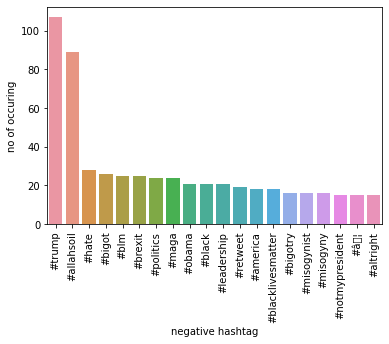

In [72]:
ax=sns.barplot(x=df_negative['negative hashtag'], y=df_negative['no of occuring'])
plt.xticks(rotation=90);

### Encoding and decoding data
there are some smiley symbols which cannot be seen in the current dataframe. to retrieve them the following function will be performed on the tweet data 

In [157]:
def ed(text):
    try:
        return text.encode('latin1').decode('utf-8')
    except ValueError:
        return text


In [158]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(ed)


In [159]:
df.tail(20)

,label,tweet,cleaned_tweet,hashcount
29510,0,@user she's finally here! @user,she's finally here!,0
29511,0,passed first year of uni #yay #love #pass #uni...,passed first year of uni #yay #love #pass #uni...,7
29512,0,this week is flying by #humpday - #wednesday...,this week is flying by #humpday - #wednesday...,4
29513,0,@user modeling photoshoot this friday yay #mo...,modeling photoshoot this friday yay #model #...,4
29514,0,you're surrounded by people who love you (even...,you're surrounded by people who love you (even...,0
29515,0,feel like... ðð¶ð #dog #summer #hot #h...,feel like... 😝🐶😎 #dog #summer #hot #help #sun ...,7
29516,1,@user omfg i'm offended! i'm a mailbox and i'...,omfg i'm offended! i'm a mailbox and i'm pro...,2
29517,1,@user @user you don't have the balls to hashta...,you don't have the balls to hashtag me as a ...,0
29518,1,"makes you ask yourself, who am i? then am i a...","makes you ask yourself, who am i? then am i a...",0
29519,0,hear one of my new songs! don't go - katie ell...,hear one of my new songs! don't go - katie ell...,6


Here it can be seen that the data has been decoded and we can see some emojis in the text. these should be removed

### Remove Emojis

The emojis which were not visible can be viewed now. hence they can be removed


In [162]:
import demoji

def demojii(text):
    try:
        return demoji.replace(text,'')
    except ValueError:
        pass

In [163]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(demojii)

In [164]:
df.tail(10)

,label,tweet,cleaned_tweet,hashcount
29520,0,"@user you can try to 'tail' us to stop, 'butt...","you can try to 'tail' us to stop, 'butt' we'...",2
29521,0,@user you went too far with @user,you went too far with,0
29522,0,good morning #instagram #shower #water #berlin...,good morning #instagram #shower #water #berlin...,10
29523,0,#holiday bull up: you will dominate your bul...,#holiday bull up: you will dominate your bul...,1
29524,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than 2 weeks #ibiza#bringiton#mallorca#...,1
29525,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in...,0
29526,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?,0
29527,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,2
29528,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,0
29529,0,thank you @user for you follow,thank you for you follow,0


The emojis have been removed

### Remove stopwords

In [165]:
def stop_words_remove(text):
    texts=text.split()
    b=[]
    for text in texts:
        if text not in stop_words:
            b.append(text)
        else:
            pass
 
    return " ".join(b)
            
   

In [166]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(stop_words_remove)

In [167]:
df.head()

,label,tweet,cleaned_tweet,hashcount
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,1
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,3
2,0,bihday your majesty,bihday majesty,0
3,0,#model i love u take with u all the time in ...,#model love u take u time ur!!!,1
4,0,factsguide: society now #motivation,factsguide: society #motivation,1


The stopwords have been removed

### Remove hyperlinks and markups

In [172]:
def clean(raw):
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result) # greater than sign
    result = re.sub('&#x27;', "'", result) # apostrophe
    result = re.sub('&quot;', '"', result) 
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result) # paragraph tag
    result = re.sub('<i>', ' ', result) #italics tag
    result = re.sub('</i>', '', result) 
    result = re.sub('&#62;', '', result)
    result = re.sub("\n", '', result) # newline 
    return result

In [173]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(clean)

In [174]:
df.head()

,label,tweet,cleaned_tweet,hashcount
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,1
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,3
2,0,bihday your majesty,bihday majesty,0
3,0,#model i love u take with u all the time in ...,#model love u take u time ur!!!,1
4,0,factsguide: society now #motivation,factsguide: society #motivation,1


### Remove punctuations ans special characters

In [175]:
#Removing the punctuations from the tweets as they do not help in prediction
def punctuation_removal(text):
    return re.sub('[^\w\s]','',text)

In [176]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(punctuation_removal)

In [177]:
df.head(10)

,label,tweet,cleaned_tweet,hashcount
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,1
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause offer wheelc...,3
2,0,bihday your majesty,bihday majesty,0
3,0,#model i love u take with u all the time in ...,model love u take u time ur,1
4,0,factsguide: society now #motivation,factsguide society motivation,1
5,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare big talking leave chaos pay d...,1
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,0
7,0,the next school year is the year for exams.ð...,next school year year exams cant think school ...,7
8,0,we won!!! love the land!!! #allin #cavs #champ...,won love land allin cavs champions cleveland c...,5
9,0,@user @user welcome here ! i'm it's so #gr...,welcome im gr8,1


### Renaming some commonly used SMS languages

In [178]:

def rename_u(text):
    x=text.split()
    b=[]
    for a in x:
        if a=='u':
            b.append('you')
        else:
            b.append(a)
    return " ".join(b)
   
def rename_ur(text):
    x=text.split()
    b=[]
    for a in x:
        if a=='ur':
            b.append('your')
        else:
            b.append(a)
    return " ".join(b)

def rename_gr8t(text):
    x=text.split()
    b=[]
    for a in x:
        if a=='gr8t':
            b.append('great')
        else:
            b.append(a)
    return " ".join(b)

def rename_im(text):
    x=text.split()
    b=[]
    for a in x:
        if a=='im':
            b.append('i am')
        else:
            b.append(a)
    return " ".join(b)

In [179]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(rename_u)
df['cleaned_tweet']=df['cleaned_tweet'].apply(rename_ur)
df['cleaned_tweet']=df['cleaned_tweet'].apply(rename_im)
df['cleaned_tweet']=df['cleaned_tweet'].apply(rename_gr8t)
df['cleaned_tweet']=df['cleaned_tweet'].apply(stop_words_remove) # once the words are renamed stopward should be removed again
df.head()

,label,tweet,cleaned_tweet,hashcount
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,1
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause offer wheelc...,3
2,0,bihday your majesty,bihday majesty,0
3,0,#model i love u take with u all the time in ...,model love take time,1
4,0,factsguide: society now #motivation,factsguide society motivation,1


### Lemmatization 

Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices.

In [92]:
from nltk.stem import WordNetLemmatizer


In [185]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmma(text):
    b=[]
    x=nltk.word_tokenize(text)
    for a in x:
        l=lemmatizer.lemmatize(a, get_wordnet_pos(a))
        b.append(l)
    return " ".join(b)
        
        

In [186]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(lemmma)


In [187]:
df.head()

,label,tweet,cleaned_tweet,hashcount
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,1
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause offer wheelc...,3
2,0,bihday your majesty,bihday majesty,0
3,0,#model i love u take with u all the time in ...,model love take time,1
4,0,factsguide: society now #motivation,factsguide society motivation,1


### Visualizing through wordClouds

In [97]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

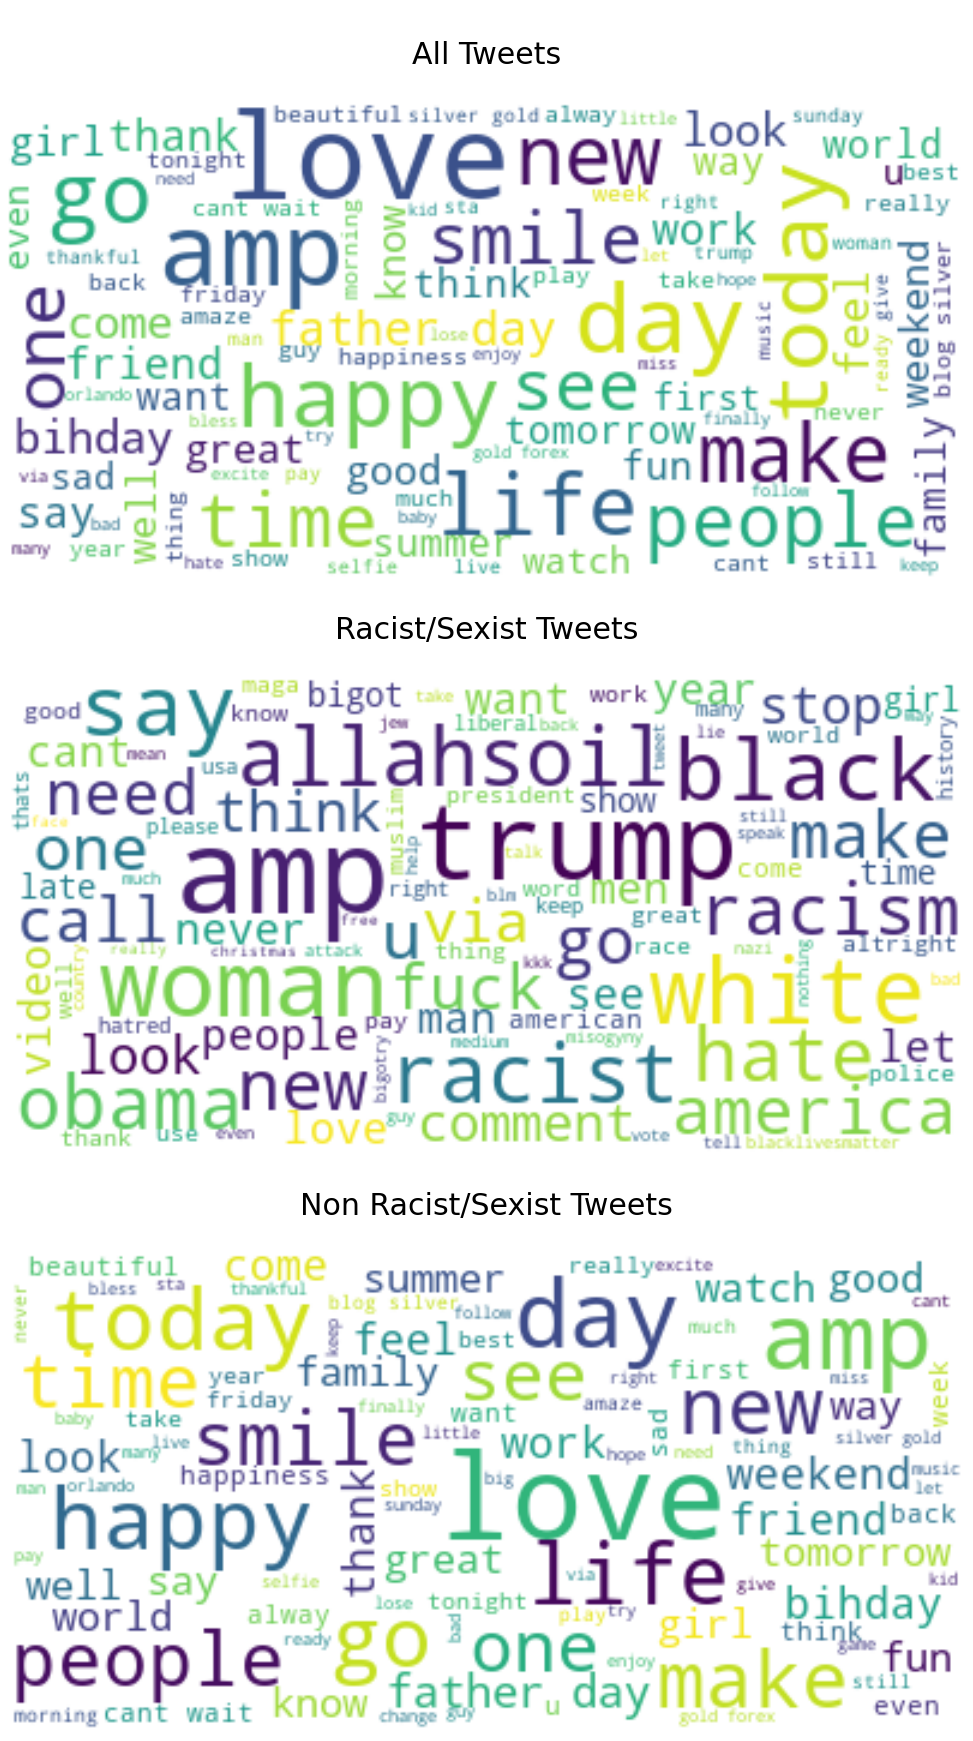

In [98]:
df_negative= df[df['label']==1]
df_positive = df[df['label']==0]
tweet_All = " ".join(review for review in df.cleaned_tweet)
tweet_negative = " ".join(review for review in df_negative.cleaned_tweet)
tweet_positive = " ".join(review for review in df_positive.cleaned_tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_negative)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_positive)
# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('\nAll Tweets\n', fontsize=30)
ax[0].axis('off')
print('\n')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('\nRacist/Sexist Tweets\n',fontsize=30)
ax[1].axis('off')
print('\n')
ax[2].imshow(wordcloud_positive, interpolation='bilinear')
ax[2].set_title('\nNon Racist/Sexist Tweets\n',fontsize=30)
ax[2].axis('off')

### Saving the cleaned data set for latter analysis purpose

Here the preprocessed dataframe will be saved in a seperate csv file so that it will avoid running the preprocessing stages over and over again when opening the file.
Since Hashcount and tweet will not be used for model building it will be removed from the data set prior to saving the file


In [189]:
df.drop(columns=['hashcount','tweet'],axis='columns',inplace=True)

In [190]:
df.to_csv('df-filter.csv',index=False)

## Model building


### Calling the pre processed data set

In [5]:
import pandas as pd

In [6]:
df_clean=pd.read_csv('df-filter.csv')

In [4]:
df_clean.head()

,label,cleaned_tweet
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit cant use cause offer wheelc...
2,0,bihday majesty
3,0,model love take time
4,0,factsguide society motivation


In [54]:
df_clean.isnull().sum()


label             0
cleaned_tweet    31
dtype: int64

In [7]:
df_clean.dropna(inplace=True)

In [56]:
df_clean.label.value_counts()

0    27489
1     2010
Name: label, dtype: int64

In [8]:
df_clean.isnull().sum()

label            0
cleaned_tweet    0
dtype: int64

In [9]:
df_clean.shape

(29499, 2)

In [9]:
df_clean.index=range(0,29499)

### Applying countvectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
X=df_clean.drop(columns='label',axis='columns')
y=df_clean['label']

In [12]:
vec =CountVectorizer(max_features=20000)
x=vec.fit_transform(X['cleaned_tweet']).toarray()


In [13]:
x.shape

(29499, 20000)

### Splitting the data set into train and test cases. 

as the data set is imbalanced we use the method =stratify when splitting the 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)

### Building the model

In [20]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [21]:
m=l.fit(X_train,y_train)

In [22]:
m.score(X_train,y_train)

0.9796600319628069

In [44]:
m.score(X_test,y_test)

0.9566101694915254

In [23]:
y_predict=m.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
# print classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8247
           1       0.83      0.45      0.59       603

    accuracy                           0.96      8850
   macro avg       0.89      0.72      0.78      8850
weighted avg       0.95      0.96      0.95      8850



The recall of the minority class is is very small

In [26]:
C=confusion_matrix(y_test,y_predict)
C


array([[8190,   57],
       [ 329,  274]], dtype=int64)

### Predicting the test values and evaluating the accuracy of the model

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'true')

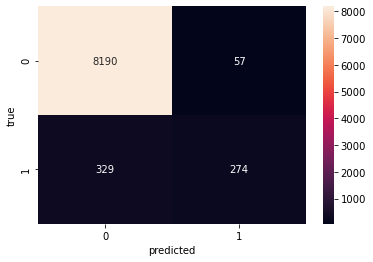

In [29]:
sns.heatmap(C,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel("true")

### Applying SMOTE


The training set is Imbalanced therefore it will train well for the most occuring label than the other category. Then the model will perform well for the most occuring category. To overcome this the minority class will be over sampled. such that   new examples are synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique (SMOTE)


In [16]:
from imblearn.over_sampling import SMOTE

In [18]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 1407
Before OverSampling, counts of label '0': 19242 



In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

MemoryError: Unable to allocate 2.66 GiB for an array with shape (17835, 20000) and data type float64

The computer memory is not sufficient to run the code with the current resources . hence under sampling the majoriy class will be done 

### NearMiss Algorithm: (under sampling algorythm)

In [31]:


print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 1407
Before Undersampling, counts of label '0': 19242 

After Undersampling, the shape of train_X: (2814, 20000)
After Undersampling, the shape of train_y: (2814,) 

After Undersampling, counts of label '1': 1407
After Undersampling, counts of label '0': 1407


In [30]:

# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      8247
           1       0.18      0.80      0.30       603

    accuracy                           0.74      8850
   macro avg       0.58      0.77      0.57      8850
weighted avg       0.93      0.74      0.80      8850



In [32]:
a=lr2.fit(X_train_miss, y_train_miss)

In [33]:
b=a.predict(X_test)

In [35]:
print(classification_report(y_test,b))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      8247
           1       0.18      0.80      0.30       603

    accuracy                           0.74      8850
   macro avg       0.58      0.77      0.57      8850
weighted avg       0.93      0.74      0.80      8850



The recall has been reduced in positive label but has increase negative label. therefore somewhat balance when compared to the previous test. but since the results are somewhat balanced (0.74, 0.80), this can be considered as a better model

In [46]:
cm=confusion_matrix(y_test,b)
cm

array([[6073, 2174],
       [ 120,  483]], dtype=int64)

Text(33.0, 0.5, 'true')

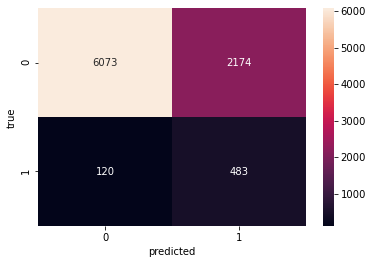

In [49]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel("true")